In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

dataset "Drug Classification" https://www.kaggle.com/prathamtripathi/drug-classification


The target feature is **Drug type**


The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

In [79]:
drug_df = pd.read_csv("drug.csv")
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [80]:
drug_df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

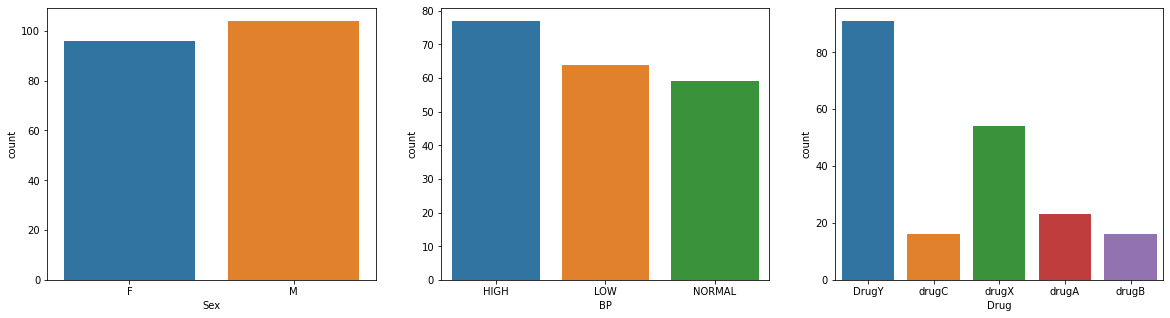

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sn.countplot(x="Sex", data=drug_df, ax=axs[0])
sn.countplot(x='BP',data=drug_df, ax=axs[1])
sn.countplot(x='Drug',data=drug_df, ax=axs[2])
plt.show()

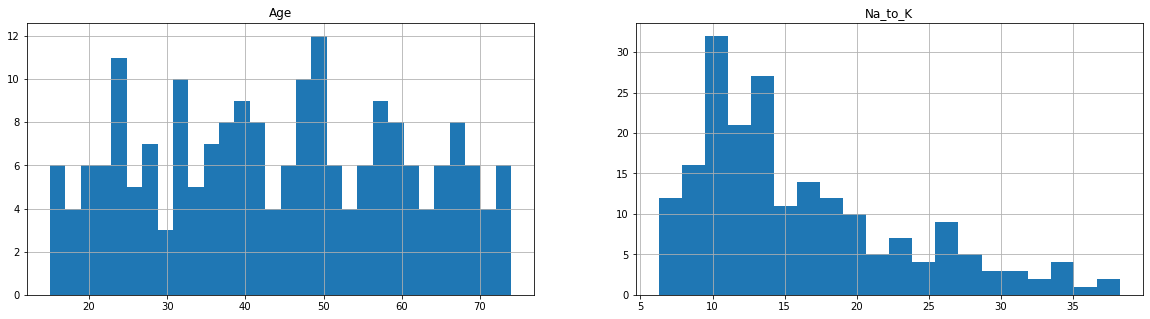

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
drug_df["Age"].hist(bins=30, ax=axs[0])
drug_df["Na_to_K"].hist(bins=20, ax=axs[1])
axs[0].set_title("Age")
axs[1].set_title("Na_to_K")
plt.show()

In [83]:
label_encoder = LabelEncoder()

categorical_features = ["Sex", "Drug", "BP", "Cholesterol"]
for feature in categorical_features:
    print(drug_df[feature].unique())
    drug_df[feature]=label_encoder.fit_transform(drug_df[feature])
    print(drug_df[feature].unique())

['F' 'M']
[0 1]
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
[0 3 4 1 2]
['HIGH' 'LOW' 'NORMAL']
[0 1 2]
['HIGH' 'NORMAL']
[0 1]


In [84]:
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


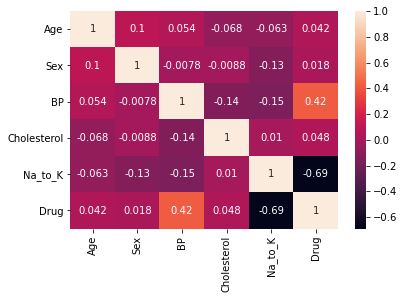

Drug           1.000000
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Na_to_K       -0.689051
Name: Drug, dtype: float64

In [85]:
corrMatrix = drug_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix["Drug"].sort_values(ascending=False)

### Train-Test Split

In [86]:
Y = drug_df['Drug']
X = drug_df.drop(['Drug'],axis = 1)
print(X.shape, Y.shape)

(200, 5) (200,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

### Model

In [88]:
classifier = MLPClassifier(hidden_layer_sizes=(16), max_iter=5000, activation = 'logistic',
                           alpha=0.0001, solver='lbfgs',random_state=1)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [89]:
cm = confusion_matrix(y_pred, y_test)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]


In [92]:
accuracy = classifier.score(X_test, y_test)
# acr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Choosing number of layers

In [93]:
for i in range(12, 27, 2):
    mlp =  MLPClassifier(hidden_layer_sizes=(i), max_iter=10000, activation = 'logistic',
                           alpha=0.0001, solver='lbfgs',random_state=1)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f"{i} neurons. accuracy=", mlp.score(X_test, y_test))

12 neurons. accuracy= 0.975
14 neurons. accuracy= 0.975
16 neurons. accuracy= 1.0
18 neurons. accuracy= 0.9
20 neurons. accuracy= 1.0
22 neurons. accuracy= 0.975
24 neurons. accuracy= 0.95
26 neurons. accuracy= 1.0
